<a href="https://colab.research.google.com/github/gisynw/ssj-302/blob/main/docs/Lectures/Week09_Geopandas_Raster/Week09_Geopandas_raster.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" style="height: 30px;"/>
</a>
&nbsp &nbsp
<a href="./Week09_Geopandas_Raster/Week09_Geopandas_raster.ipynb" target="_blank"> 
  <img src="https://img.icons8.com/?size=100&id=108635&format=png&color=000000" alt="Download" style="height: 40px;"/>
 </a>

<center>
    <h2 style="color:  #008080; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;">
        Rasterio and Geopandas
    </h2>
</center>

### 1. Introduction
[Rasterio](https://rasterio.readthedocs.io/en/stable/) is a Python library designed for reading, writing and analyzing geospatial raster data. It leverages the powerful [GDAL](https://gdal.org/en/latest/) (Gspatial Data Abstraction Library) to offer a streamlined interface for working with raster datasets like satellite imagery, digital elevation models (DEMs), and other gridded data. Rasterio makes it easier to manipulate and analyze raster data, particulary when integrated with otehr Python tools like Numpy, pandas, and matplotlib, make it valuable tool for geospatial data processing and analysis. 

[Geopandas](https://geopandas.org/en/stable/) is an open source project to processing geospatial data in python environment easier and efficient. GeoPandas extend the functionality from pandas to allow spatial operation on geometric types. 





### 2. Installation
Creating a clean virtual envionrment is not strictly necessary, but install all packages in the same global environment may cause dependency conflicts. So it's recommend to install the geopandas in a clean virutual environment

1. Create a virtual environment with name as 'gpd' and specify python version as 3.9
```
conda create --name gpd python=3.9
```

2. Activate virtual environment 'gpd'
```
activate gpd
```

4. Install the latest version of geopandas, rasterio and ipykernel
```
conda install -c conda-forge geopandas rasterio fiona

# Windows:
codna install ipykernel

# Mac:
pip install ipykernel
```


### 3. Get to know Geospatial Data

- [Great Smoky Mountain Geospatial Dataset](https://www.nps.gov/grsm/learn/nature/datasets.htm)
- [30-m Digital Elevation Model](https://irma.nps.gov/DataStore/Collection/Profile/34)
- [Mountain Boundary](https://irma.nps.gov/DataStore/Collection/Profile/551)

### 4. Importing libraries

In [27]:
import geopandas as gpd
import rasterio
import os
import rasterio.plot

### 5. Reading Raster Data

In [10]:
os.getcwd()

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Lectures\\Week09_Geopandas_Raster'

In [15]:
dem_path = os.path.join(os.getcwd(),  "data\GSM_tiff.tif")
dem_path

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Lectures\\Week09_Geopandas_Raster\\data\\GSM_tiff.tif'

In [17]:
# Set up the path of your data
dem = rasterio.open()
print(dem)

<open DatasetReader name='f:\Clark_Universiy\Clark_Teaching\Git_Repo\ssj-302\docs\Lectures\Week09_Geopandas_Raster\data\GSM_tiff.tif' mode='r'>


## 6. Extracting Basic Information about Raster

### 6.1 File name

In [18]:
dem.name

'f:\\Clark_Universiy\\Clark_Teaching\\Git_Repo\\ssj-302\\docs\\Lectures\\Week09_Geopandas_Raster\\data\\GSM_tiff.tif'

### 6.2 File Mode

### 6.3 File mode
The raster data can be opened in read-only (`r`) or write (`w`) mode. 

In [19]:
# Get file mode of your data


'r'

### 6.4 Metadata
The metadata comes from a GeoTIFF file, which is a common format for storing geospatial raster ata, such as DEM. 
- Nodata: the value used to represent 'No data' or missing data.
- Width & Height: The number of column and row in the raster
- [Affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) show the information about the pixel
    - a,b,c,d,e,f (a and e are pixel width and height, c and f are the coordinates of the upper left corner of thr raster, b and d are rotation)

In [20]:
# Get meta information


{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 3078,
 'height': 1500,
 'count': 1,
 'crs': CRS.from_epsg(26917),
 'transform': Affine(31.158870870020053, 0.0, 224971.75836973768,
        0.0, -34.882999032583086, 3972216.91492623)}

### 6.3 Spatial Resolution

In [21]:
dem.res

(31.158870870020053, 34.882999032583086)

### 6.4 Spatial Dimensions: Width and Height

In [23]:
# Get width of your data


3078

In [24]:
dem.height

1500

### 6.5 Spatial Bounds

In [25]:
dem.bounds

BoundingBox(left=224971.75836973768, bottom=3919892.4163773553, right=320878.7629076594, top=3972216.91492623)

### 6.6 Number of bands

In [29]:
# get the number of bands

1

## 7.Plotting Raster Data
rasterio.plot.show() is a simple way to display a raster image, showing the first band of the raster by default

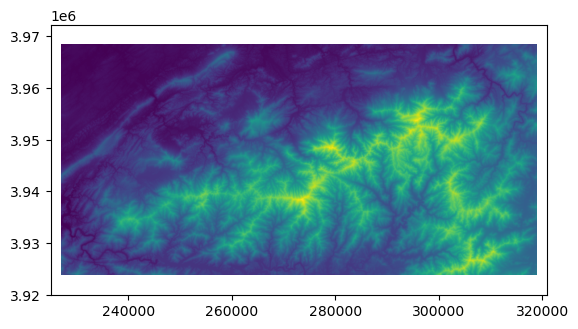

<Axes: >

In [28]:
# Plot dem data


### 7.1 Customizing Plots
You can further enhance your plots with color maps and titles. 

The cmap parameter in the function allows you to specify a color map to apply to the image, which controls how different values are represented in color

In [30]:
import matplotlib.pyplot as plt

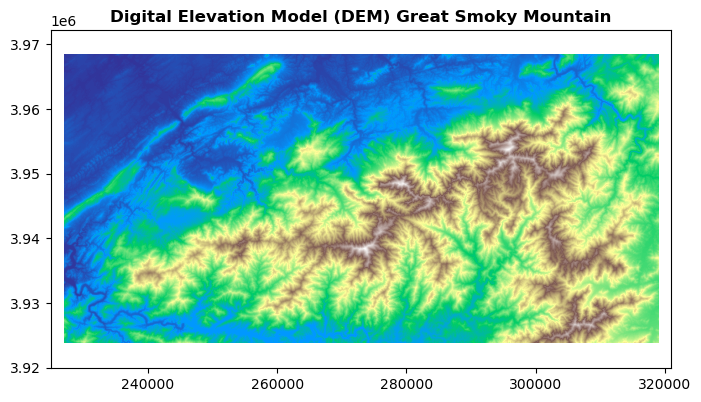

In [35]:
# set up cmap as "terrain"
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(dem, cmap=, ax=ax, title="Digital Elevation Model (DEM) Great Smoky Mountain")
plt.show()

### 7.2 Overlay vector on Raster
In geographic data visualization, overlaying vector data (such as polygons) on raster data is a common technique to provide spatial context and enhance interpretation. For instance, to highlight the boundary of the Great Smoky Mountains, you can overlay a polygon vector on a raster DEM. The vector layer defines distinct boundaries or features, while the raster layer provides continuous data (elevation, temperature, etc.). This combination allows users to see how geographic features relate to underlying spatial patterns.

In [37]:
vector_path = os.path.join(os.getcwd(),  "data\GSM_boundary\GSM_boundary.shp")
gdf = gpd.read_file(vector_path)

<Axes: title={'center': 'Digital Elevation Model (DEM) & Boundary'}>

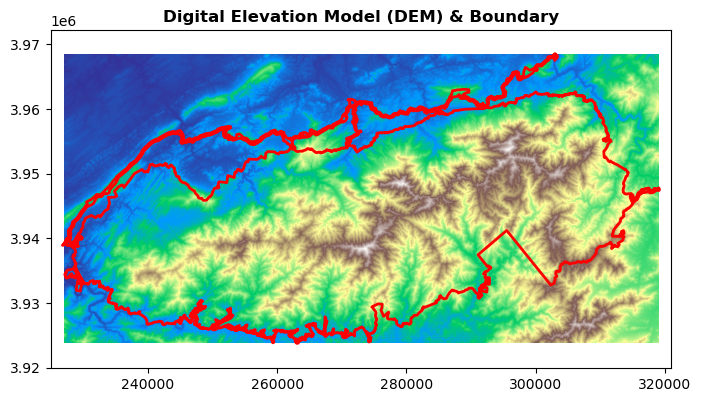

In [58]:
# plot shapefile through plot function
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(dem, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) & Boundary")


## 8. Masking a raster using a shapefile
Masking a raster with a shapefile is a process that extracts the raster data within a specified geographic boundary defined by the shapefile. This is useful for focusing on a particular area of interest, such as limiting a DEM to the boundary of the Great Smoky Mountains. The shapefile (a vector format) acts as a "cookie-cutter" that trims the raster, retaining only the values inside the shapefile's polygons and setting areas outside the boundary to "no data." 

In [41]:
import fiona
import rasterio.mask

### 8.1 Read shapefile

In [43]:
# set up the mode as "r" 


with fiona.open(vector_path, "r") as shapefile:
    # loop through the geometry in the shapefile

In [44]:
shapes

[fiona.Geometry(coordinates=[[(247227.3799999999, 3927253.6500000004), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(248053.38999999966, 3929508.6999999993), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(229206.36000000034, 3933396.2300000004), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(230048.3799999999, 3932994.0299999993), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(291979.0, 3932384.8900000006), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(292209.08999999985, 3932679.5299999993), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(292707.11000000034, 3933387.75), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(228519.78000000026, 3935299.8500999995), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(229514.3700000001, 3933944.0299999993), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(230137.08999999985, 3933020.9399999995), ...]], type='Polygon'),
 fiona.Geometry(coordinates=[[(228689.34999999963, 3935626.03

### 8.2 Clip raster

In [45]:
# check the output from the rasterio.mask.mask
# set up the raster and polygon
out_image, out_transform = rasterio.mask.mask(, , crop=True)

### 8.3 Update information about clipped raster

In [46]:
out_meta = dem.meta

In [63]:
out_image.shape

(1, 1286, 2964)

In [ ]:
# update the meta information about raster

out_meta.update(
    {
        "driver": "GTiff",
        "height": ,
        "width": ,
        "transform": out_transform,
    }
)

### 8.4 Writing a masked or modified raster image to a new file called "dem_clip.tif"

In [47]:
# set up mode as "w"

with rasterio.open("dem_clip.tif", , **out_meta) as dst:
    dst.write(out_image)

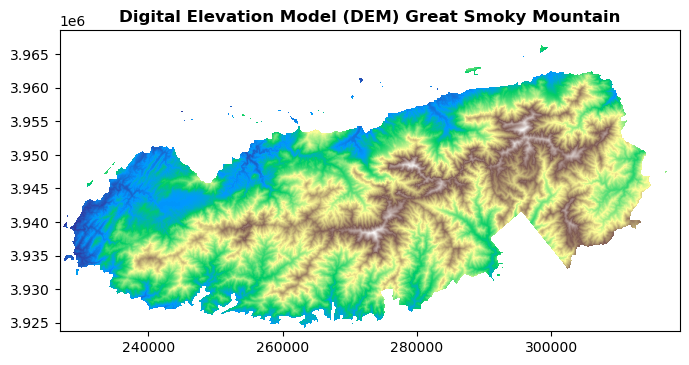

In [56]:
clip_dem_path = os.path.join(os.getcwd(), 'dem_clip.tif')
clip_dem = rasterio.open(clip_dem_path)

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(clip_dem, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM) Great Smoky Mountain")
plt.show()
